In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

In [3]:
x = np.linspace(-8 * np.pi, 8 * np.pi, num = 101, dtype = np.float32)

In [4]:
y1 = np.exp(-0.01 * np.square(x))

In [5]:
y2 = y1 * np.cos(x)

In [6]:
y3 = (y2 + np.random.uniform(-0.1, 0.1, size = x.size)).astype(np.float32)

In [7]:
print(y1.dtype)
print(y2.dtype)
print(y3.dtype)

float32
float32
float32


In [8]:
np.put(y2, [40, 41, 42], np.nan)
np.put(y3, [52, 53, 54], np.nan)

print(y2[39:61])
print(y3[39:61])

[ 0.53695256         nan         nan         nan -0.8215065  -0.9058561
 -0.75949556 -0.40891013  0.06137878  0.53043866  0.87409544  1.
  0.87409544  0.53043866  0.06137878 -0.40891013 -0.75949556 -0.9058561
 -0.8215065  -0.5422522  -0.15270224  0.24002302]
[ 0.53703463  0.15025039 -0.1907366  -0.511771   -0.81255955 -0.9359864
 -0.7645937  -0.393599    0.05661862  0.59103465  0.90483093  1.0635097
  0.9455732          nan         nan         nan -0.71465963 -0.8058694
 -0.7338447  -0.6164702  -0.23558003  0.2737342 ]


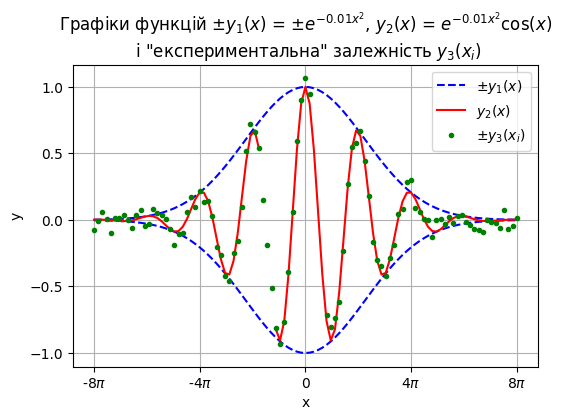

In [9]:
fig, ax = plt.subplots()
ax.plot(x, y1, "--b", label="$\pm$$y_1(x)$")
ax.plot(x, -y1, "--b")
ax.plot(x, y2, "-r", label="$y_2(x)$")
ax.plot(x, y3, ".g", label="$\pm$$y_3(x_i)$")
ax.legend()
ax.set(xlabel="x", ylabel="y",
      title="Графіки функцій $\pm$$y_1(x)$ = $\pm$$e^{-0.01x^{2}}$, $y_2(x)$ = $e^{-0.01x^{2}}$$\cos(x)$" 
       "\n і \"експериментальна\" залежність $y_3(x_i)$")
ax.set_xticks(np.arange(-8 * np.pi, 8 * np.pi + 4 * np.pi, step=4 * np.pi))
ax.set_xticklabels(("-8$\pi$", "-4$\pi$", "0", "4$\pi$", "8$\pi$"))
ax.set(yticks=np.arange(-1., 1. + .5, step=.5))
ax.grid()

In [10]:
y4 = y3[np.power(y3, 2) > .1]
print(np.mean(y4))
print(np.median(y4))

0.009855303
-0.34687945


In [11]:
np.save("x.npy", x)
np.save("y1.npy", y1)
np.save("y2.npy", y2)
np.save("y3.npy", y3)


In [12]:
np.savez_compressed("xy.npz", x=x, y1=y1, y2=y2, y3=y3)

In [13]:
with np.load("xy.npz") as saved:
  x_saved = saved["x"]
  y1_saved = saved["y1"]
  y2_saved = saved["y2"]
  y3_saved = saved["y3"]

In [14]:
print(np.array_equal(x, x_saved))
print(np.array_equal(y1, y1_saved))
print(np.array_equal(y2, y2_saved))
print(np.array_equal(y3, y3_saved))

True
True
False
False


In [15]:
np.savetxt("xy.csv", np.transpose((x, y1, y2, y3)), header="x,y1,y2,y3", delimiter=',', comments="")

In [16]:
with open("xy.csv", "r") as saved:
    data = np.genfromtxt(saved, dtype=np.float32, skip_header=1, delimiter=',')

In [17]:
x_csv = np.transpose(data)[0]
y2_csv = np.transpose(data)[2]
print(np.array_equal(x, x_csv))
print(np.array_equal(y2, y2_csv))

True
False


In [19]:
arr = np.random.rand(3,3)
print(arr)
print(arr[0])
print(arr[:,0])

[[0.83784403 0.7528847  0.75387337]
 [0.14159912 0.71505208 0.97783755]
 [0.59497071 0.62905046 0.65985562]]
[0.83784403 0.7528847  0.75387337]
[0.83784403 0.14159912 0.59497071]
